In [8]:
import numpy as np
import unittest
import numpy as np
import timeit
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [12]:
class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None
   
    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.
        """
        rng = np.random.default_rng(self.random_state)
        indices = rng.choice(len(data), size=self.n_clusters, replace=False)
        self.centroids = data[indices]

        for _ in range(self.max_iterations):
            # Assign data points to the nearest cluster
            self.labels = self.predict(data)

            # Update centroids based on the assigned data points
            new_centroids = np.array([data[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def predict(self, data):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.

        Returns:
        - labels: Array of cluster labels assigned to each data point.
        """
        # Implementation of data point assignment
        # Calculate distances to centroids
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)

        # Assign each data point to the cluster with the nearest centroid
        labels = np.argmin(distances, axis=1)

        return labels

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Returns:
        - centroids: Numpy array representing the centroids of clusters.
        """
        return self.centroids

In [26]:
class TestKMeans(unittest.TestCase):
    def setUp(self):
        # Set up common data for tests
        np.random.seed(42)
        self.data = np.random.rand(100, 2)
        self.kmeans = KMeans(n_clusters=3, max_iterations=100, random_state=42)

    def test_fit(self):
        # Test that the centroids are initialized
        self.assertIsNone(self.kmeans.centroids)
        self.assertIsNone(self.kmeans.labels)

        # Test that the fit method works
        self.kmeans.fit(self.data)
        self.assertIsNotNone(self.kmeans.centroids)
        self.assertIsNotNone(self.kmeans.labels)

        # Test that the number of centroids matches the specified number of clusters
        self.assertEqual(len(self.kmeans.centroids), self.kmeans.n_clusters)

        # Test that the number of labels matches the number of data points
        self.assertEqual(len(self.kmeans.labels), len(self.data))

    def test_predict(self):
        # Test that predict method works
        self.kmeans.fit(self.data)
        labels = self.kmeans.predict(self.data)
        self.assertEqual(len(labels), len(self.data))
        self.assertIn(min(labels), range(self.kmeans.n_clusters))
        self.assertIn(max(labels), range(self.kmeans.n_clusters))

    def test_get_centroids(self):
        # Test that get_centroids returns centroids after fitting
        self.kmeans.fit(self.data)
        centroids = self.kmeans.get_centroids()
        self.assertIsNotNone(centroids)
        self.assertEqual(centroids.shape, (self.kmeans.n_clusters, self.data.shape[1]))

suite = unittest.TestLoader().loadTestsFromTestCase(TestKMeans)
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.014s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

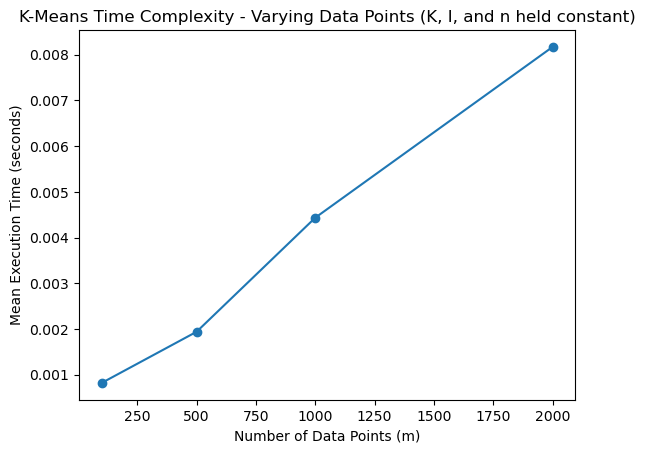

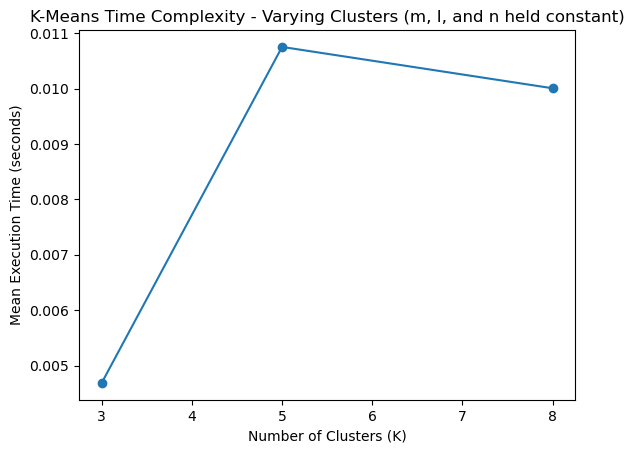

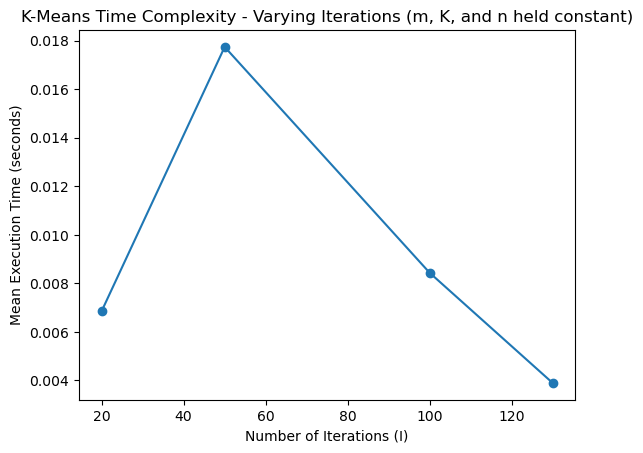

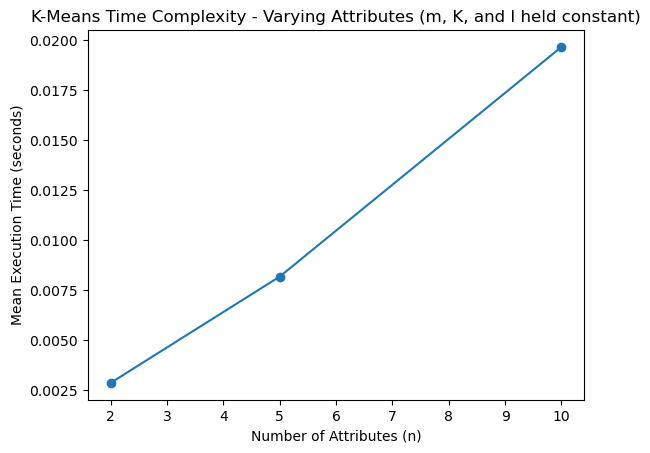

In [42]:
# Generate synthetic data
m_values = [100, 500, 1000, 2000]
k = 3
max_iterations = 100
attributes = 3
num_runs = 30  # Number of runs for each scenario

# Function to run KMeans and measure execution time
def run_kmeans(data, k, max_iter):
    kmeans = KMeans(n_clusters=k, max_iterations=max_iter, random_state=42)
    execution_time = timeit.timeit(lambda: kmeans.fit(data), number=1)
    return execution_time

# Plot 1: Varying Data Points (m) while holding K, I, and n constant
execution_times_m = []
for m in m_values:
    data = np.random.rand(m, attributes)
    execution_times_run = [run_kmeans(data, k, max_iterations) for _ in range(num_runs)]
    execution_times_m.append(np.mean(execution_times_run))

plt.plot(m_values, execution_times_m, marker='o')
plt.xlabel('Number of Data Points (m)')
plt.ylabel('Mean Execution Time (seconds)')
plt.title('K-Means Time Complexity - Varying Data Points (K, I, and n held constant)')
plt.show()

# Plot 2: Varying Clusters (K) while holding m, I, and n constant
execution_times_k = []
for k_value in [3, 5, 7]:
    data = np.random.rand(m_values[-1], attributes)
    execution_times_run = [run_kmeans(data, k_value, max_iterations) for _ in range(num_runs)]
    execution_times_k.append(np.mean(execution_times_run))

plt.plot([3, 5, 8], execution_times_k, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Execution Time (seconds)')
plt.title('K-Means Time Complexity - Varying Clusters (m, I, and n held constant)')
plt.show()

# Plot 3: Varying Iterations (I) while holding m, K, and n constant
execution_times_i = []
for iterations in [20, 50, 100, 130]:
    data = np.random.rand(m_values[-1], attributes)
    execution_times_run = [run_kmeans(data, k, iterations) for _ in range(num_runs)]
    execution_times_i.append(np.mean(execution_times_run))

plt.plot([20, 50, 100, 130], execution_times_i, marker='o')
plt.xlabel('Number of Iterations (I)')
plt.ylabel('Mean Execution Time (seconds)')
plt.title('K-Means Time Complexity - Varying Iterations (m, K, and n held constant)')
plt.show()

# Plot 4: Varying Attributes (n) while holding m, K, and I constant
execution_times_n = []
for n_value in [2, 5, 10]:
    data = np.random.rand(m_values[-1], n_value)
    execution_times_run = [run_kmeans(data, k, max_iterations) for _ in range(num_runs)]
    execution_times_n.append(np.mean(execution_times_run))

plt.plot([2, 5, 10], execution_times_n, marker='o')
plt.xlabel('Number of Attributes (n)')
plt.ylabel('Mean Execution Time (seconds)')
plt.title('K-Means Time Complexity - Varying Attributes (m, K, and I held constant)')
plt.show()

### 1. Number of Data Points (m): As the number of data points increases, the execution time generally grows. This is likely due to the increase in distance calculations and centroid udpates with increasing data points. However the relationship may not be plinear due to optimization techniques or hardware constraints.
### 2. Number of Clusters (K): An increase in the number of clusters leads to a higher execution time. More clusters require more centroids calculation. The increase may not be linear, and there could be a point where further increasing K has diminishing returns in terms of execution time.
### 3. Number of Iterations (I): Execution time tends to grow with an increase in the number of iterations. Each iteration involves assigning data points to clusters and updating centroids. More iterations mean more computation, contributing to increased running time. There might be a point where additional iterations provide minimal improvement, and the algorithm converges.
### 4. Number of Attributes (n): As the number of attributes increases, the execution time generally grows. Additional attributes contribute to higher-dimensional space, leading to increased computation for distance calculations and centroid updates. The relationship might not be linear, and the impact may vary based on the specific data distribution.

### Plateaus or diminishing returns in the plots may suggest areas where further optimization efforts could be focused. Algorithm Convergence: Observe if and when the algorithm converges. The point where the execution time stabilizes or shows diminishing returns indicates when further iterations may not significantly improve results.
### Outliers or Anomalies: Look for unexpected spikes or drops in execution time that might indicate anomalies or outliers in the data.

In [31]:
class ImageCompressor:
    def __init__(self, n_colors=16):
        self.n_colors = n_colors
        self.kmeans = KMeans(n_clusters=n_colors, random_state=42)
        self.original_image = None
        self.compressed_image = None

    def load_image(self, image_path):
        """
        Load and convert the image to a NumPy array.

        Parameters:
        - image_path: Path to the image file.

        Returns:
        - image_array: NumPy array representing the image pixels.
        """
        image = Image.open(image_path)
        self.original_image = np.array(image)
        return self.original_image

    def compress_image(self):
        """
        Compress the image using K-Means clustering.
        """
        # Reshape the image to represent pixel space
        m, n, _ = self.original_image.shape
        pixels = self.original_image.reshape((m * n, 3))
    
        # Fit K-Means to the pixel data
        self.kmeans.fit(pixels)
    
        # Predict cluster labels for each pixel
        labels = self.kmeans.predict(pixels)
    
        # Retrieve cluster centers
        try:
            cluster_centers = self.kmeans.cluster_centers_
        except AttributeError:
            # If 'cluster_centers_' is not available, calculate centroids manually
            cluster_centers = np.array([pixels[labels == k].mean(axis=0) for k in range(self.kmeans.n_clusters)])
    
        # Replace each pixel with its cluster centroid
        compressed_pixels = cluster_centers[labels].astype(np.uint8)
    
        # Reshape the compressed pixels to the original image shape
        self.compressed_image = compressed_pixels.reshape((m, n, 3))


    def display_images(self):
        """
        Display the original and compressed images side by side.
        """
        plt.figure(figsize=(10, 5))

        # Original Image
        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(self.original_image)
        plt.axis('off')

        # Compressed Image
        plt.subplot(1, 2, 2)
        plt.title(f'Compressed Image - {self.n_colors} Colors')
        plt.imshow(self.compressed_image)
        plt.axis('off')

        plt.show()

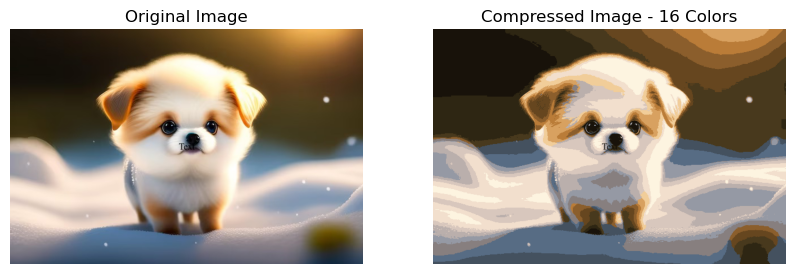

In [43]:
image_path = "/Users/clairezhou/Downloads/puppy1.jpg" 
compressor = ImageCompressor(n_colors=16)
original_image = compressor.load_image(image_path)
compressor.compress_image()
compressor.display_images()

### The visual impact of image compression using K-Means clustering includes the reduction of the number of distinct colors in the image. By mapping the pixel space into clusters and replacing each pixel with its cluster centroid, it effectively reduces the palette of colors used in the image. There could also be loss of details. In regions with gradual color transitions, the compressed image might exhibit noticeable artifacts. Sudden jumps between cluster centroids can create visual discontinuities. The impact on the image's appearance depends on factors such as the number of clusters chosen and the characteristics of the image itself.